In [22]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
def f1 (z, z02):
    f1 = np.sqrt(z02 - z**2)
    return f1
def f2 (z):
    f2 = z*np.tan(z)
    return f2
def f3 (z):
    f3 = -z*np.tan(np.pi/2-z)
    return f3

In [6]:
def guess (z02, y, z, h):
    t = np.arange(y, z, h)
    d = 10
    z = ['NaN', 'NaN', 'NaN', 'NaN']
    Z = []
    diff = [0,0]
    trig = [0,0]
    
    for i in t:
        f = [f1(i, z02), f2(i), f3(i)]
        diff[0] = f[0]-f[1]
        diff[1] = f[0]-f[2]
        
        if diff[0] >= 0 and diff[0] < d:
            trig = [1,0]
            d = diff[0]
            z = [i, f[0], f[1], diff[0], 'odd']
        
        if diff[1] >= 0 and diff[1] < d:
            trig = [0,1]
            d = diff[1]
            z = [i, f[0], f[2], diff[1], 'even']
        
        if diff[0] <= 0 and trig[0] == 1 and abs(diff[0]) < d: #I figured that checking for the very next value after the closest, which will have a negative difference, would yield even more acurate results, but nah.
            trig[0] = 0
            Z.append(z)
            d = 10
        
        if diff[1] <= 0 and trig[1] == 1 and abs(diff[1]) < d:
            trig[1] = 0
            Z.append(z)
            d = 10
        
        if trig[0] == 1 and abs(diff[0]) > d:
            trig[0] = 0
            Z.append(z)
            d = 10
        
        if trig[1] == 1 and abs(diff[1]) > d:
            trig[1] = 0
            Z.append(z)
            d = 10
                            
    return Z #Returns [z, f1(z), f2(z), accuracy or difference, even/oddness]

In [69]:
hc = 1240
x = 0.51E6
a = 0.125
T = 30
z02 = (2*x*T*np.pi**2*a**2)/hc**2
z0 = np.sqrt(z02)

Z = guess(z02, 0, z0, .00001)
Z

[[0.9782900000000001,
  1.4532567950615225,
  1.4532116617016277,
  4.513335989475564e-05,
  'odd'],
 [1.7297600000000002,
  0.2773751591121444,
  0.2773087610734582,
  6.639803868618843e-05,
  'even']]

/tmp/ipykernel_17716/2654275841.py:2: RuntimeWarning: invalid value encountered in sqrt
  f1 = np.sqrt(z02 - z**2)


(0.0, 5.0)

(0.0, 3.0)

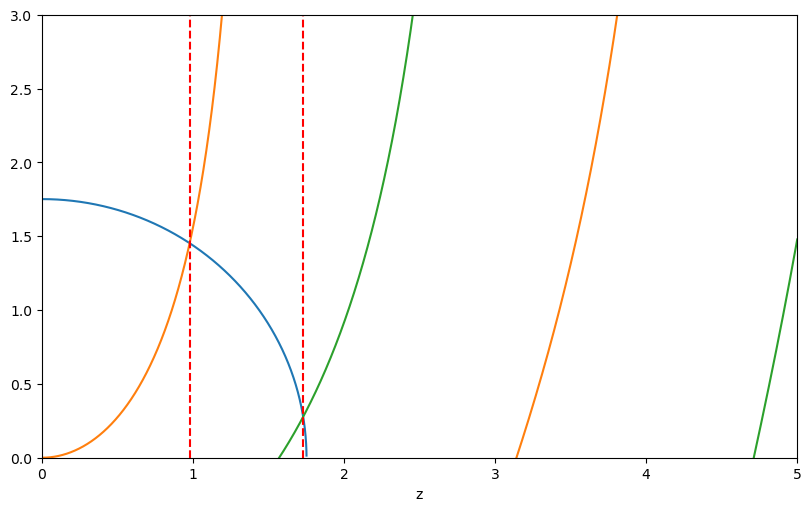

In [105]:
t = np.arange(0, 5, 0.0001)
x = f1(t, z02)
y = f2(t)
z = f3(t)

utol = 100.
ltol = -100.
y[y>utol] = np.inf
y[y<ltol] = -np.inf
z[z>utol] = np.inf
z[z<ltol] = -np.inf


fig = plt.figure(figsize=(8,5), dpi=100, layout="constrained")

ax = fig.add_subplot(1,1,1, xlabel='z')
ax.set_xlim(0, 5)
ax.set_ylim(0,3)

ax.plot(t, x)
ax.plot(t, y)
ax.plot(t, z)

for i in range(len(Z)):
    ax.vlines(Z[i][0], 0, 20, colors = 'red', linestyle='dashed')


$\lambda = \frac{2\pi}{k} = \frac{2\pi a}{z}$

In [71]:
lamb = []
for i in range(len(Z)):
    lamb.append((2*np.pi*a)/(Z[i][0]))

In [72]:
lamb

[0.8028275494970287, 0.4540503673327214]

$\delta = \frac{1}{q} = \frac{a}{\sqrt{z_0^2-z^2}}$

In [73]:
delta = []
for i in range(len(Z)):
    delta.append(a/(z02-Z[i][0]**2))

In [74]:
delta

[0.05918685838972424, 1.624706373961946]

(-0.5, 0.5)

(-1.0, 1.0)

(-0.5, 0.5)

(-1.0, 1.0)

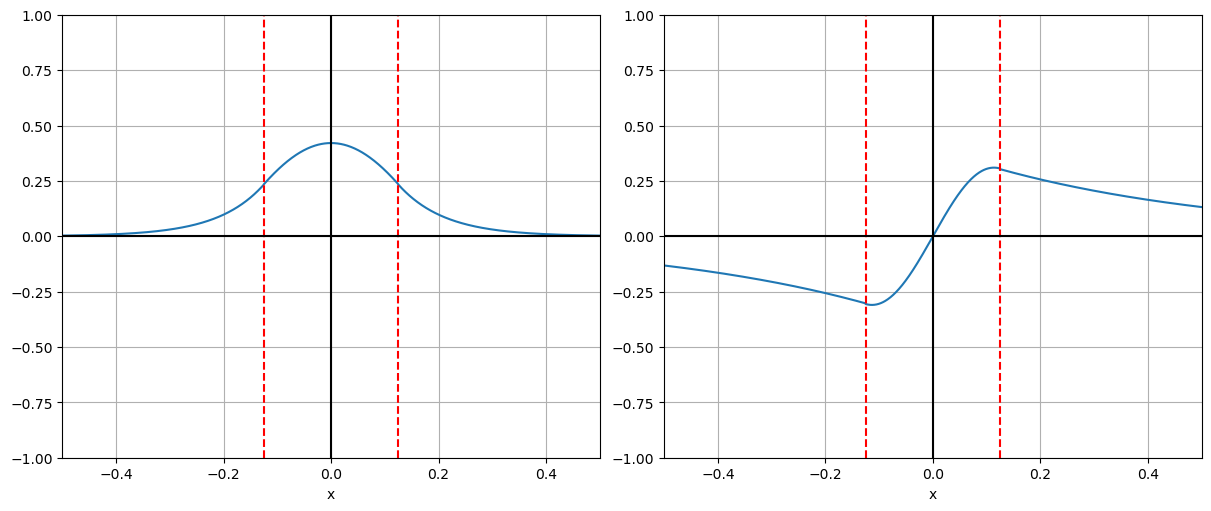

In [101]:
fig = plt.figure(figsize=(12,5), dpi=100, layout="constrained")

ax = fig.add_subplot(1,2,1, xlabel='x')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-1, 1)

t = np.arange(-.5, .5, 0.001)
x = []

k = Z[0][0]/a
q = np.sqrt(z02-Z[0][0]**2)/a

for i in t:
    if i <= -0.125:
        x.append(np.exp(q*i))
    if i > -0.125 and i < 0.125:
        x.append(0.421*np.cos(k*i))
    if i >= 0.125:
        x.append(np.exp(-q*i))

ax.plot(t, x)
ax.vlines(-.125, -1, 2, colors = 'red', linestyle='dashed')
ax.vlines(.125, -1, 2, colors = 'red', linestyle='dashed')
ax.hlines(0, -1, 1, colors = 'black')
ax.vlines(0, -1, 1, colors = 'black')
ax.grid(True)

ax = fig.add_subplot(1,2,2, xlabel='x')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-1, 1)

t = np.arange(-.5, .5, 0.001)
x = []

k = Z[1][0]/a
q = np.sqrt(z02-Z[1][0]**2)/a
s = 0.4

for i in t:
    if i <= -0.125:
        x.append(-s*np.exp(q*i))
    if i > -0.125 and i < 0.125:
        x.append(0.31*np.sin(k*i))
    if i >= 0.125:
        x.append(s*np.exp(-q*i))

ax.plot(t, x)
ax.vlines(-.125, -1, 2, colors = 'red', linestyle='dashed')
ax.vlines(.125, -1, 2, colors = 'red', linestyle='dashed')
ax.hlines(0, -1, 1, colors = 'black')
ax.vlines(0, -1, 1, colors = 'black')
ax.grid(True)

Not normalized.

Also the function and plot can handle arbitrary values. I was tempted to automate the process all the way through plotting every energy level as well, and normalizing the plots too. But it's late on a work night, I waited too late to go out to get food, and I just sneezed and now my head is pounding.

/tmp/ipykernel_17716/2654275841.py:2: RuntimeWarning: invalid value encountered in sqrt
  f1 = np.sqrt(z02 - z**2)


(0.0, 18.23391672003996)

(0.0, 18.23391672003996)

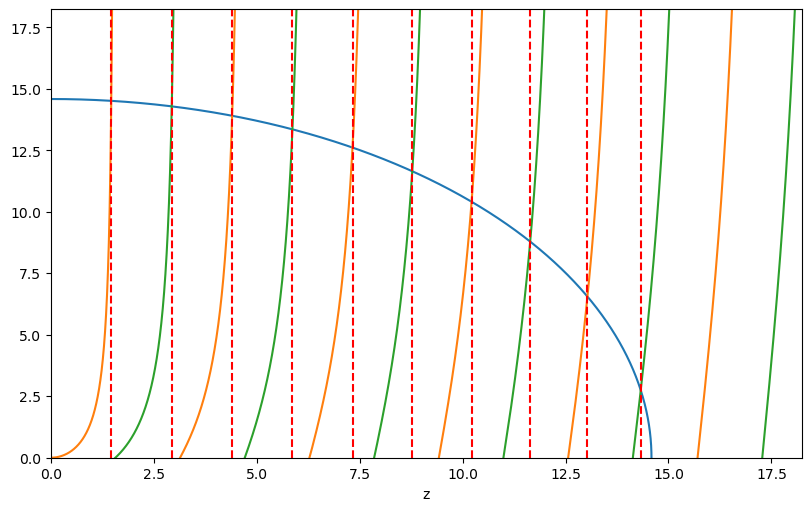

In [113]:
hc = 1240
x = 0.51E6
a = 0.5
T = 130
z02 = (2*x*T*np.pi**2*a**2)/hc**2
z0 = np.sqrt(z02)

Z = guess(z02, 0, z0, .00001)

t = np.arange(0, z02*1.15, 0.0001) #The plot of this above is statically sized for the exercise. This is programmed to set the limits based on the (z_0) param.
x = f1(t, z02)
y = f2(t)
z = f3(t)

utol = 1000.
ltol = -1000.
y[y>utol] = np.inf
y[y<ltol] = -np.inf
z[z>utol] = np.inf
z[z<ltol] = -np.inf


fig = plt.figure(figsize=(8,5), dpi=100, layout="constrained")

ax = fig.add_subplot(1,1,1, xlabel='z')
ax.set_xlim(0, max(x)*1.25)
ax.set_ylim(0,max(x)*1.25)

ax.plot(t, x)
ax.plot(t, y)
ax.plot(t, z)

for i in range(len(Z)):
    ax.vlines(Z[i][0], 0, 20, colors = 'red', linestyle='dashed')

In [114]:
Z

[[1.4698600000000002,
  14.51288984697899,
  14.512762041538117,
  0.00012780544087220846,
  'odd'],
 [2.93874,
  14.288046309504523,
  14.287809414642993,
  0.00023689486152989048,
  'even'],
 [4.40557,
  13.905948838725312,
  13.905433298742523,
  0.0005155399827891927,
  'odd'],
 [5.8691,
  13.354329834182838,
  13.354132556277035,
  0.00019727790580326143,
  'even'],
 [7.327680000000001,
  12.613071233753729,
  12.613060297474838,
  1.0936278890483209e-05,
  'odd'],
 [8.77898,
  11.649633912262901,
  11.649466417627554,
  0.00016749463534715403,
  'even'],
 [10.219370000000001,
  10.409079543035771,
  10.409030294805103,
  4.924823066865258e-05,
  'odd'],
 [11.64221,
  8.788822813440138,
  8.788813486146923,
  9.327293215122268e-06,
  'even'],
 [13.032280000000002,
  6.5531777125106085,
  6.5530269109645625,
  0.00015080154604607543,
  'odd'],
 [14.326480000000002,
  2.7452560790836564,
  2.745062199245239,
  0.0001938798384175655,
  'even']]